<a href="https://colab.research.google.com/github/reganmeloche/ML-from-scratch/blob/main/naive_bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes


Sources
- https://www.youtube.com/watch?v=O2L2Uv9pdDA&ab_channel=StatQuestwithJoshStarmer
- https://machinelearningmastery.com/naive-bayes-classifier-scratch-python/
- https://machinelearningmastery.com/bayes-theorem-for-machine-learning/
- Udemy course: https://www.udemy.com/course/machinelearning/

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import math

%matplotlib inline

## Theory


Formula for calculating conditional probability.

Marginal probability: Probability of an event irrespective of outcomes of other random variables
- P(A)
- aka Prior probability

Joint probability: Probability of two or more simultaneous events. 
- P(A and B) or P(A,B)

Conditional probability: Probability of one event given the occurrence of another event,
- P(A|B)
- aka Posterior probability

Rules
- P(A,B) = P(A|B) * P(B)
- P(A,B) = P(B,A)
- P(A|B) = P(A,B) / P(B)
- P(A|B) != P(B|A)

**Bayes Theorem: P(A|B) = P(B|A) * P(A) / P(B)**

Bayes Theorem gives us a way of calculating the conditional probability without having the joint probability.

Posterior probablity = Likelihood * Prior / Evidence

Example: What is the probability that there is fire, given that there is smoke?
- Prior: P(fire)
- Likelihood: P(smoke|fire)
- evidence: P(smoke)

P(fire|smoke) = P(smoke|fire) * P(fire) / P(smoke)

We can frame a classification task as calculating the conditional probablity of a class label given a sample of data:
- P(class|data) = P(data|class) * P(class) / P(data)

This could be calculated for each class, and the class that is assigned the largest probabiltiy is predicted.

But it gets too complicated when we have multiple features, so we need to simplify the calculation. Bayes assumes that each input variable is dependent on all the others, which makes the calculation very complex. If we consider each input variable to be independent of each other, then the calculation is simplified. 
- P(class|X1, X2, ... , Xn) = [P(X1|class) * P(X2|class) * ... * P(Xn|class)] * P(class) / P(data)

This is referred to as **Naive Bayes**.

### Example 1

Scenario: 
- Consider a human population that may or may not have cancer
- A medical test returns positive or negative for detecting cancer

True positive rate is important in medical field - how often is it detected when the patient actually has cancer. Suppose we know it:
- P(pos|C) = 0.85

Suppose we also know the probability of getting a certain type of cancer:
P(C) = 0.02

Now we can calculate the probability of a patient having cancer given a positive test using Bayes theorem:
- P(A|B) = P(B|A) * P(A) / P(B)
- P(C|pos) = P(pos|C) * P(C) / P(pos)
- P(C|pos) = 0.85 * 0.0002 / P(pos)

To get P(pos), we can estimate
- P(pos) = P(pos|C) * P(C) + P(pos|not_C) * P(not_pos)
- P(pos) = 0.85 * 0.0002 + P(pos|not_c) * (1 - 0.0002)

At this point we need more information. We need to know how good the test is at correctly identifying people who do not have cancer (specificity).
- Suppose it is 95%
- P(not_pos | not_C)
- P(pos | not_C) = 1 - 0.95 = 0.05

Plug it all in:
- P(pos) = (0.85 * 0.0002) + (0.055 * 0.9998) = 0.05016
- probability of returning a positive result is about 5%

Now back to Bayes:
- P(C|pos) = 0.85 * 0.0002 / 0.05016 = 0.003389
- so if a patient tests positive, then there is actually only a 0.33% chance that they have cancer
- This is a very bad diagnostic test

We often need these pieces of information
- Sensitivity: 85% of people with cancer will get a positive result
- Base rate: 0.02% of people have cancer
- Specificity: 95% of people without cancer will get a negative test result

### Example 2

2 machines that produce a part.
- M1: produces 30/hr
- M2: produces 20/hr

1% of all parts are defective
- Of the defective ones, 50% are from M1 and 50% are from M2

What is the probability of a defective part, given that it came from M2:
- P(def|M2) = P(M2|def) * P(def) / P(M2)
- P(def|M2) = 0.5 * 0.01 / (30/50) = 0.0125



In [ ]:
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    p_not_a = 1 - p_a
    p_b = p_b_given_a * p_a + (p_b_given_not_a * p_not_a)
    p_a_given_b = p_b_given_a * p_a / p_b

    return p_a_given_b

In [ ]:
p_a = 0.0002
p_b_given_a = 0.85
p_b_given_not_a = 0.05
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
print(f'{round(result*100,3)}%')

0.339%


## Calculating Probabilities

We will use the iris dataset built in to sklearn as an example. We will use the first two columns for our input X. there are 3 possible values for y (0,1,2).




In [ ]:
from sklearn import datasets
import seaborn as sns
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

If we were given a new x value, we want to predict which of the three classes it is in.

Applying Bayes, it would look something like this:
- P(y=0|X) = P(X|y=0) * P(y=0) / P(X)
- P(y=1|X) = P(X|y=1) * P(y=1) / P(X)
- P(y=2|X) = P(X|y=2) * P(y=2) / P(X)

So we would calculate these three probablities and take the maximum one as our prediction. Since P(X) is going to be the same for each calculation, we can simplify our calculations by dropping it.

Now let's zoom in a little more on a probability calculation. We can think of X as the set of columns. We have 2 columns, X1 and X1, so our probability equation now looks something like this:
- P(y=0|X) = P(y=0|X1,X2) = P(X1|y=0) * P(X2|y=0) * P(y=0) 

So we have 3 terms to calculate.
- P(X1|y=0): What is the probability of some value X1 for the first columns, given that the classification would be y = 0
- P(X2|y=0): Same thing, but for X2
- P(y=0): Marginal probability of being classified as y = 0. For this one, we simply divide the number of values where y = 0 by the total number of observations. We therefore want to focus on the first two.

In order to get a probability for a certain value, we must assume some sort of probability distribution for the values of the column. For simplicity's sake, we will assume normal/Gaussian distribution, although this may not always be a reality.

We can do some quick data visualization to see how the data in the columns is distributed. We can see that it is somewhat normally distributed. 




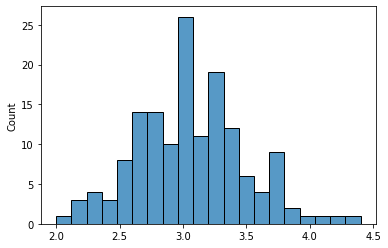

In [ ]:
sns.histplot(X[:, 1], bins=20)

In order to calculate a probability for a value x, we can use the probability density function for normal distribution, which is as follows:

$$ {\frac {1}{\sigma {\sqrt {2\pi }}}}e^{-{\frac {1}{2}}\left({\frac {x-\mu }{\sigma }}\right)^{2}} $$

Where $\sigma$ is the standard deviation of the column, and $\mu$ is the mean.

Let's calculate these values for the second column:

In [ ]:
def mean(vals):
    return round(sum(vals) / float(len(vals)),3)

def std(vals):
    m = mean(vals)
    v = sum([(x-m)**2 for x in vals]) / float(len(vals) - 1)
    return round(math.sqrt(v),3)

# Gaussian Probability Density Function
def gaussian_pdf(x, mean, stdev):
    exponent = math.exp(-((x - mean)**2 / (2 * stdev**2 )))
    res = (1 / (math.sqrt(2 * math.pi) * stdev)) * exponent
    return round(res, 4)

We can use the mean and standard deviation to estimate some probability densities for some values of x. But we're not just interested in the marginal probabilities. We want to know P(X2|y=0). Therefore, we need to take the values from our dataset where y = 0. The data is evenly distributed, so the values end up being about the same. 

In [ ]:
col2 = X[:,1]
col2_y0 = col2[y==0]
mu = mean(col2)
sd = std(col2)

print(f'Mean: {mu}, Std: {sd}')

for x in [3.05, 3, 2, 1]:
    px = gaussian_pdf(x, mu, sd)
    print(f'x: {x}, prob: {px}')

Mean: 3.057, Std: 0.436
x: 3.05, prob: 0.9149
x: 3, prob: 0.9072
x: 2, prob: 0.0484
x: 1, prob: 0.0


We will want to store the mean and standard deviation values, since we will be using them a lot. To this end, we will define a function that stores the set of all these values. Since we have 2 columns and 3 values for y, we will be storing 6 separate objects. Each object will contain the corresponding mean and standard deviation.

In [ ]:
def get_mean_sd_set(X, y):
    num_cols = X.shape[1]
    y_vals = set(y)
    result = np.empty((num_cols,len(y_vals)), dict)

    for i in range(num_cols):
        x = X[:,i]

        for j in y_vals:
            xj = x[y==j]
            v = {
                'm': mean(xj),
                's': std(xj)
            }

            result[i,j] = v
        
    return result


In [ ]:
ms_set = get_mean_sd_set(X,y)
print(ms_set)

[[{'m': 5.006, 's': 0.352} {'m': 5.936, 's': 0.516}
  {'m': 6.588, 's': 0.636}]
 [{'m': 3.428, 's': 0.379} {'m': 2.77, 's': 0.314}
  {'m': 2.974, 's': 0.322}]]


### Example

Let's consider a concrete example. Suppose we get a new value of [5.7, 2.8]. To decide which class it belongs in, we need to use Bayes for each of the 3 possible y values and take the max:

- P(y=0|X1,X2) = P(X1|y=0) * P(X1|y=0) * P(y=0)
- P(y=1|X1,X2) = ...
- P(y=2|X1,X2) = ...

We have a probability for each y value. We take the max to get our final prediction.

In [ ]:
new_x = np.array([5.7, 2.8])

y_vals = list(set(y))

probs = []

for j in range(len(y_vals)):
    p_y = len(X[y==y_vals[j]]) / len(X)
    total = p_y

    for i in range(len(new_x)):
        d = ms_set[i,j]
        next_prob = gaussian_pdf(new_x[i], d['m'], d['s'])
        total *= next_prob
    
    probs.append(total)

print(probs)

i = np.argmax(probs)
pred_y = y_vals[i]

print(f'Prediction: {pred_y}')

[0.014428469999999999, 0.29357902666666663, 0.08447033999999999]
Prediction: 1


## Naive Bayes Class

Now we can put all this theory together, and use some of the previously defined functions to build our custom Naive Bayes classifier.

In [ ]:
class MyNaiveBayes:
    def __init__(self):
        self.__ms_set = None
        self.__y_probs = {}
        self.__y_vals = None
    
    def fit(self, X, y):
        self.__ms_set = get_mean_sd_set(X,y)
        # Capture the y probabilities
        self.__y_vals = list(set(y))
        for yv in self.__y_vals:
            p_y = len(X[y==yv]) / len(X)
            self.__y_probs[yv] = p_y
    

    def predict(self, X):
        return [self._predict(x) for x in X]


    def _predict(self, x):
        probs = []
        for j in range(len(self.__y_vals)):
            yv = self.__y_vals[j]
            p_y = self.__y_probs[yv]
            total = p_y

            for i in range(len(x)):
                d = self.__ms_set[i,j]
                next_prob = gaussian_pdf(x[i], d['m'], d['s'])
                total *= next_prob
            
            probs.append(total)

        max_ind = np.argmax(probs)
        pred_y = self.__y_vals[max_ind]

        return pred_y
    




## Evaluation and Comparison

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [ ]:
iris = datasets.load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, stratify=y)

In [ ]:
my_nb = MyNaiveBayes()

my_nb.fit(X_train, y_train)

y_pred = my_nb.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
# Comparison with sklearn
nb = GaussianNB()

nb.fit(X_train, y_train)

y_pred2 = nb.predict(X_test)

print(metrics.classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

